In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#数据格式化

datafile = open('log.lammps', 'r', encoding='utf-8')
datas = datafile.readlines()
#print(type(datas))
datalist = []
for i in range(len(datas)-1):
    datas[i] = ' '.join(datas[i].split())
    datalist.append(datas[i])

#print(datalist)
    
datafile.close()



datafile = open('log.txt', 'w')

data = '\n'.join(datalist)

datafile.write(data)

datafile.close()


In [8]:
contents = pd.read_csv('log.txt', sep=' ')

star = int(input("起始行数："))

end = int(input("结束行数："))

contents = contents.iloc[star: end+1, :]

#contents = contents.drop(0)

contents.head()

起始行数：300
结束行数：400


,Step,Temp,PotEng,c_msd_all[4],c_msd_cr[4],c_msd_fe[4],c_msd_o[4],c_msd_cr2o3[4],v_twopoint_all,v_twopoint_cr,v_twopoint_fe,v_twopoint_o,v_twopoint_cr2o3,v_fitslope_all,v_fitslope_cr,v_fitslope_fe,v_fitslope_o,v_fitslope_cr2o3
300,300000,300.47775,-2105746.8,0.204865,0.229713,0.162536,0.259450,0.247556,0.000114,0.000128,0.000090,0.000144,0.000138,0.000103,0.000118,0.000082,0.000131,0.000126
301,301000,300.44003,-2105762.5,0.205695,0.232434,0.162208,0.261488,0.249868,0.000114,0.000129,0.000090,0.000145,0.000138,0.000103,0.000118,0.000081,0.000131,0.000126
302,302000,300.78622,-2105740.3,0.204825,0.229882,0.162573,0.259505,0.247657,0.000113,0.000127,0.000090,0.000143,0.000137,0.000103,0.000117,0.000081,0.000130,0.000125
303,303000,300.25827,-2105760.1,0.206939,0.232420,0.163880,0.262071,0.250211,0.000114,0.000128,0.000090,0.000144,0.000138,0.000102,0.000117,0.000081,0.000130,0.000125
304,304000,298.60422,-2105760.0,0.206077,0.230879,0.162680,0.261130,0.249031,0.000113,0.000127,0.000089,0.000143,0.000137,0.000102,0.000117,0.000081,0.000130,0.000125


In [13]:
Step = contents['Step']/1000

Temp = contents['Temp']

PE = contents['PotEng']

msd_Cr2O3_Fe = contents['c_msd_all[4]']

msd_Cr = contents['c_msd_cr[4]']

msd_Fe = contents['c_msd_fe[4]']

msd_O = contents['c_msd_o[4]']

msd_Cr2O3 = contents['c_msd_cr2o3[4]']

v_twopoint_Cr2O3_Fe = contents['v_twopoint_all']

v_twopoint_Cr = contents['v_twopoint_cr']

v_twopoint_Fe = contents['v_twopoint_fe']

v_twopoint_O = contents['v_twopoint_o']

v_twopoint_Cr2O3 = contents['v_twopoint_cr2o3']

v_fitslope_Cr2O3_Fe = contents['v_fitslope_all']

v_fitslope_Cr = contents['v_fitslope_cr']

v_fitslope_Fe = contents['v_fitslope_fe']

v_fitslope_O = contents['v_fitslope_o']

v_fitslope_Cr2O3 = contents['v_fitslope_cr2o3']

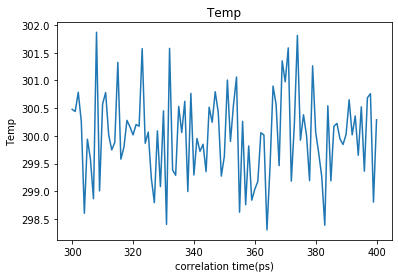

In [14]:
# Temp
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("Temp")
plt.plot(Step, Temp)
plt.title('Temp')

plt.show()

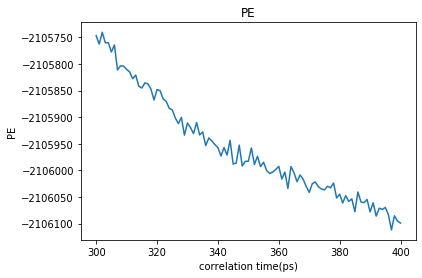

In [15]:
# Temp
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("PE")
plt.plot(Step, PE)
plt.title('PE')

plt.show()

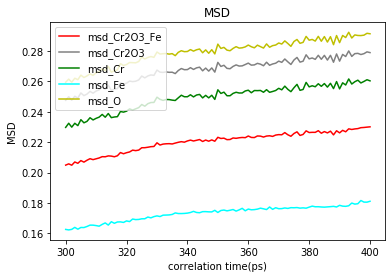

In [18]:
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("MSD")
plt.plot(Step, msd_Cr2O3_Fe, color='r', label='msd_Cr2O3_Fe')
plt.plot(Step, msd_Cr2O3, color='grey', label='msd_Cr2O3')
plt.plot(Step, msd_Cr, color='g', label='msd_Cr')
plt.plot(Step, msd_Fe, color='cyan', label='msd_Fe')
plt.plot(Step, msd_O, color='y', label='msd_O')
plt.legend(loc="upper left")
plt.title('MSD')

plt.show()

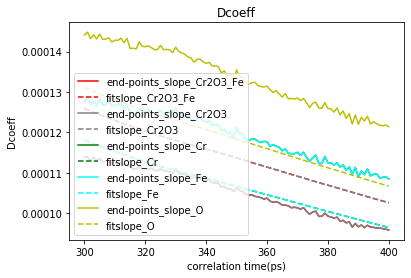

In [25]:
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("Dcoeff")
plt.plot(Step, v_twopoint_Cr2O3_Fe, color="r", linestyle='-', label='end-points_slope_Cr2O3_Fe')
plt.plot(Step, v_fitslope_Cr2O3, color="r", linestyle='--', label='fitslope_Cr2O3_Fe')
plt.plot(Step, v_twopoint_Cr2O3_Fe, color="grey", linestyle='-', label='end-points_slope_Cr2O3')
plt.plot(Step, v_fitslope_Cr2O3, color="grey", linestyle='--', label='fitslope_Cr2O3')
plt.plot(Step, v_twopoint_Cr, color="g", linestyle='-', label='end-points_slope_Cr')
plt.plot(Step, v_fitslope_Cr, color="g", linestyle='--', label='fitslope_Cr')
plt.plot(Step, v_twopoint_Cr, color="cyan", linestyle='-', label='end-points_slope_Fe')
plt.plot(Step, v_fitslope_Cr, color="cyan", linestyle='--', label='fitslope_Fe')
plt.plot(Step, v_twopoint_O, color="y", linestyle='-', label='end-points_slope_O')
plt.plot(Step, v_fitslope_O, color="y", linestyle='--', label='fitslope_O')
plt.legend(loc="lower left")
plt.title('Dcoeff')

plt.show()